# **Laboratorijska vježba 6**: Zadaci za samostalni rad

## **Predviđanje preživaljvanja u potopu Titanika**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži podatke o putnicima Titanika te informaciju jesu li preživjeli potop. Ovaj skup podataka jedan od najpopularnijih skupova na stranici Kaggle jer dobro služi za uvođenje u rješavanje problema klasifikacije. Skup podataka sadrži sljedeće značajke:

* name - naziv putnika
* sex - spol putnika
* dob - dob putnika
* sibsp - broj braće/sestara/supružnika putnika na brodu
* parch - broj roditelja/djece putnika na brodu
* ticket - broj karte putnika
* fare - cijena karte putnika
* cabin - broj kabine putnika
* embarked - luka ukrcaja putnika

te izlaznu varijablu:

* survived - informacija je li putnik preživio katastrofu ili ne.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

In [ ]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head(5)

,survived,name,title,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,Allen,Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S
1,1,Allison,Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S
2,0,Allison,Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S
3,0,Allison,Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S
4,0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S


## **Zadatak 1: Istraživanje skupa podataka**

Istražite skup podataka na način da izračunate deskriptivnu statistiku za izlaznu varijablu. Prokomentirajte koji je udio preživjelih u potonuću Titanika.

In [ ]:
print(titanic['survived'].describe())

survivors_count = titanic['survived'].sum()
passengers_count = titanic['survived'].count()
survival_rate = (survivors_count / passengers_count) * 100
print("Survival rate: {:.2f}%".format(survival_rate))

count    1309.000000
mean        0.381971
std         0.486055
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: survived, dtype: float64
Survival rate: 38.20%


Nacrtajte dijagram raspršenosti između izlazne varijable i svakog pojedinog stupca u skupu podataka. Pomoć: možete koristiti matricu dijagrama raspršenosti iz biblioteke pandas.

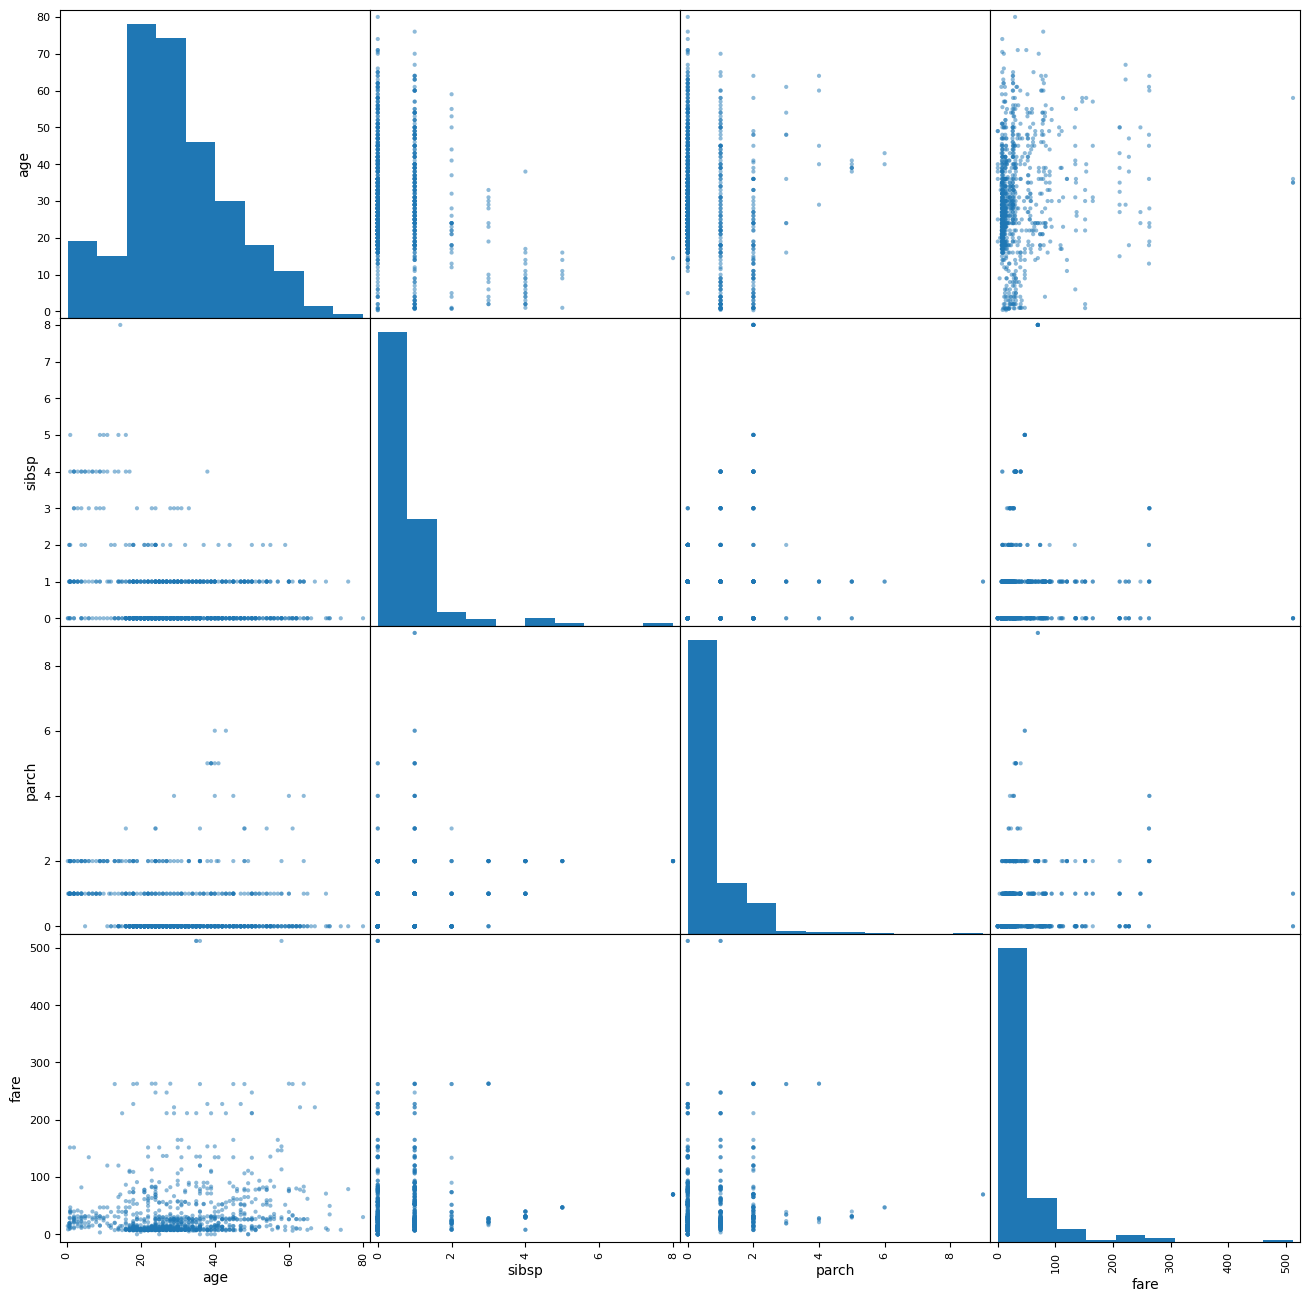

In [ ]:
cols = ['survived', 'age', 'sibsp', 'parch', 'fare']
pd.plotting.scatter_matrix(titanic[cols], figsize=(16, 16))
plt.show()

Odaberite značajke koje su po Vašem mišljenju bitne za klasifikaciju preživjelih i preminulih putnika. Kategoričke stupce pretvorite u numeričke pomoću *get_dummies()* funkcije iz biblioteke pandas. Provjerite ima li nedostajućih vrijednosti u nekom od stupaca te ih popunite na prikladan način (prosječna vrijednost, medijan, najčešća vrijednost,...). 

In [ ]:
data = pd.read_csv('data/titanic.csv')

titanic['cabin'].fillna(titanic['cabin'].mode()[0],inplace=True)
titanic['age'].fillna(titanic['age'].mean(),inplace=True)

sex=pd.get_dummies(titanic['sex'])
cabin=pd.get_dummies(titanic['cabin'])

data = titanic[['age','sibsp','parch']]
data = pd.concat([data,sex],axis=1)
data = pd.concat([data,cabin],axis=1)
data = pd.concat([data,titanic['survived']],axis=1)
data.head()

,age,sibsp,parch,female,male,A10,A11,A14,A16,A18,...,F E69,F G63,F G73,F2,F33,F38,F4,G6,T,survived
0,29.0000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.9167,1,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2.0000,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30.0000,1,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25.0000,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Zatim podijelite skup podataka na trening i test (u omjeru 70-30). Pripazite na to da u podskupovima za trening i test bude jednak **omjer** preživjelih i preminulih putnika.

In [ ]:
from sklearn.model_selection import train_test_split

X=data.drop(['survived'],axis=1)
y=data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

## **Zadatak 2: Logistička regresija**

Na podskupu za trening istrenirajte model algoritma logističke regresije. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test. 

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predicted_labels = model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions)
train_recall = recall_score(y_train, train_predictions)
train_f1 = f1_score(y_train, train_predictions)

test_accuracy = accuracy_score(y_test, predicted_labels)
test_precision = precision_score(y_test, predicted_labels)
test_recall = recall_score(y_test, predicted_labels)
test_f1 = f1_score(y_test, predicted_labels)

print('Trening:')
print(f'CAC: {train_accuracy}')
print(f'Precision: {train_precision}')
print(f'Recall: {train_recall}')
print(f'F1: {train_f1}\n')

print('Test:')
print(f'CAC: {test_accuracy}')
print(f'Precision: {test_precision}')
print(f'Recall: {test_recall}')
print(f'F1: {test_f1}')

Trening:
CAC: 0.8122270742358079
Precision: 0.7602339181286549
Recall: 0.7428571428571429
F1: 0.7514450867052024

Test:
CAC: 0.8091603053435115
Precision: 0.7551020408163265
Recall: 0.74
F1: 0.7474747474747474


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistička regresija koristi prag vjerojatnosti kako bi odlučila u koju klasu treba svrstati primjerak. U nekim slučajevima, želimo razumjeti kako se model ponaša na različitim razinama ovog praga. Iscrtajte ROC krivulju na temelju stvarnih vrijednosti izlazne varijable i predviđenih vjerojatnosti oznaka klasa koje daje logistička regresija (*predict_proba*). Izračunajte površinu ispod krivulje, odnosno vrijednost mjere AUC. 

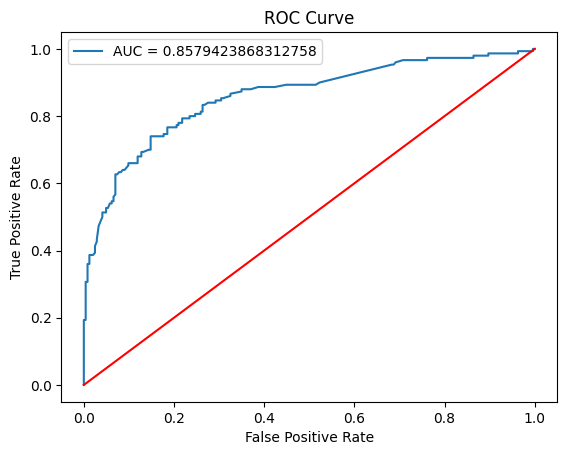

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {auc_score}')
plt.plot([0, 1], [0, 1], linestyle='-', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## **Zadatak 3: Stroj potpornih vektora**

Na podskupu za trening istrenirajte model algoritma SVM s linearnom jezgrom. Ispišite jednadžbu granice između klasa te ju protumačite. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

feature_cols = data.columns[:-1]


for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(svm.coef_[0][f], feature_cols[f]))
print(svm.intercept_[0])

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print('Trening:')
print(f'CAC: {train_acc}')
print(f'Precision: {train_precision}')
print(f'Recall: {train_recall}')
print(f'F1: {train_f1}\n')

print('Test:')
print(f'CAC: {test_acc}')
print(f'Precision: {test_precision}')
print(f'Recall: {test_recall}')
print(f'F1: {test_f1}')

-1.7890922435981338e-05 * age + 
-0.0006887175894529918 * sibsp + 
-1.1700782174273172e-05 * parch + 
1.0002950675881888 * female + 
-1.0002950675881643 * male + 
-0.618920934648439 * A10 + 
0.0 * A11 + 
0.0 * A14 + 
0.0 * A16 + 
0.0 * A18 + 
-0.6176695654856276 * A19 + 
1.0 * A20 + 
0.0 * A21 + 
0.0 * A23 + 
-0.6197437288411797 * A24 + 
0.0 * A26 + 
-1.0 * A29 + 
1.0 * A31 + 
-0.6176686257066623 * A32 + 
1.3792723435617718 * A34 + 
-0.6194176642048722 * A36 + 
-0.6195171207439515 * A5 + 
1.0 * A6 + 
-0.6188161511262981 * A7 + 
1.0 * A9 + 
-0.618722947995857 * B10 + 
1.0 * B101 + 
0.0 * B102 + 
-0.6199533537568644 * B11 + 
0.0 * B18 + 
-0.6182375554359373 * B19 + 
0.0 * B20 + 
-0.6194715363735079 * B22 + 
-0.6200819201205967 * B24 + 
0.0 * B26 + 
0.0 * B28 + 
0.0 * B3 + 
-0.6207520369623086 * B30 + 
0.0 * B35 + 
0.0 * B36 + 
-0.6200814701475262 * B37 + 
-0.6180713992257266 * B38 + 
0.0 * B39 + 
0.0 * B4 + 
1.0 * B41 + 
0.0 * B42 + 
1.0 * B45 + 
1.0 * B49 + 
0.0 * B5 + 
1.0 * B50 + 
0.0

Istražite učinkovitost algoritma SVM s različitim jezgrama (polinomijalne s različitim stupnjem te radijalne funkcije). Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test te usporedite rezultate u odnosu na rezultate dobivene s linearnom jezgrom.

In [ ]:
svm = SVC(kernel="poly", degree=2)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print('Trening:')
print(f'CAC: {train_acc}')
print(f'Precision: {train_precision}')
print(f'Recall: {train_recall}')
print(f'F1: {train_f1}\n')

print('Test:')
print(f'CAC: {test_acc}')
print(f'Precision: {test_precision}')
print(f'Recall: {test_recall}')
print(f'F1: {test_f1}')

Trening:
CAC: 0.6331877729257642
Precision: 0.8888888888888888
Recall: 0.045714285714285714
F1: 0.08695652173913045

Test:
CAC: 0.6335877862595419
Precision: 0.875
Recall: 0.04666666666666667
F1: 0.08860759493670886


In [ ]:
svm = SVC(kernel="poly", degree=3)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print('Trening:')
print(f'CAC: {train_acc}')
print(f'Precision: {train_precision}')
print(f'Recall: {train_recall}')
print(f'F1: {train_f1}\n')

print('Test:')
print(f'CAC: {test_acc}')
print(f'Precision: {test_precision}')
print(f'Recall: {test_recall}')
print(f'F1: {test_f1}')

Trening:
CAC: 0.6626637554585153
Precision: 0.8867924528301887
Recall: 0.13428571428571429
F1: 0.23325062034739452

Test:
CAC: 0.6539440203562341
Precision: 0.7916666666666666
Recall: 0.12666666666666668
F1: 0.21839080459770116


In [ ]:
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print('Trening:')
print(f'CAC: {train_acc}')
print(f'Precision: {train_precision}')
print(f'Recall: {train_recall}')
print(f'F1: {train_f1}\n')

print('Test:')
print(f'CAC: {test_acc}')
print(f'Precision: {test_precision}')
print(f'Recall: {test_recall}')
print(f'F1: {test_f1}')

Trening:
CAC: 0.6179039301310044
Precision: 0.5
Recall: 0.005714285714285714
F1: 0.01129943502824859

Test:
CAC: 0.6259541984732825
Precision: 1.0
Recall: 0.02
F1: 0.0392156862745098


Istražite učinkovitost algoritma SVM sa složenijim jezgrama kada se pri njegovu treniranju koristi regularizacija. Isprobajte nekoliko vrijednosti za koeficijent regularizacije te prokomentirajte dobivene rezultate. 

In [ ]:
svm = SVC(kernel="rbf", C=2)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print('Trening:')
print(f'CAC: {train_acc}')
print(f'Precision: {train_precision}')
print(f'Recall: {train_recall}')
print(f'F1: {train_f1}\n')

print('Test:')
print(f'CAC: {test_acc}')
print(f'Precision: {test_precision}')
print(f'Recall: {test_recall}')
print(f'F1: {test_f1}')

Trening:
CAC: 0.6965065502183406
Precision: 0.86
Recall: 0.24571428571428572
F1: 0.38222222222222224

Test:
CAC: 0.7175572519083969
Precision: 0.9148936170212766
Recall: 0.2866666666666667
F1: 0.4365482233502538


In [ ]:
svm = SVC(kernel="rbf", C=3)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print('Trening:')
print(f'CAC: {train_acc}')
print(f'Precision: {train_precision}')
print(f'Recall: {train_recall}')
print(f'F1: {train_f1}\n')

print('Test:')
print(f'CAC: {test_acc}')
print(f'Precision: {test_precision}')
print(f'Recall: {test_recall}')
print(f'F1: {test_f1}')

Trening:
CAC: 0.7794759825327511
Precision: 0.7327044025157232
Recall: 0.6657142857142857
F1: 0.6976047904191617

Test:
CAC: 0.8091603053435115
Precision: 0.7483443708609272
Recall: 0.7533333333333333
F1: 0.7508305647840532


## **Zadatak 4: Algoritam najbližih susjeda**

Na podskupu za trening istrenirajte algoritam KNN s različitim postavkama parametra $k$. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test te prokomentirajte dobivene rezultate.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knm = KNeighborsClassifier()
knm.fit(X_train, y_train)

y_train_pred = knm.predict(X_train)
y_test_pred = knm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print('Trening:')
print(f'CAC: {train_acc}')
print(f'Precision: {train_precision}')
print(f'Recall: {train_recall}')
print(f'F1: {train_f1}\n')

print('Test:')
print(f'CAC: {test_acc}')
print(f'Precision: {test_precision}')
print(f'Recall: {test_recall}')
print(f'F1: {test_f1}')

Trening:
CAC: 0.8002183406113537
Precision: 0.8081180811808119
Recall: 0.6257142857142857
F1: 0.7053140096618358

Test:
CAC: 0.7760814249363868
Precision: 0.75
Recall: 0.62
F1: 0.6788321167883211


In [ ]:
knm = KNeighborsClassifier(n_neighbors=1)
knm.fit(X_train, y_train)

y_train_pred = knm.predict(X_train)
y_test_pred = knm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print('Trening:')
print(f'CAC: {train_acc}')
print(f'Precision: {train_precision}')
print(f'Recall: {train_recall}')
print(f'F1: {train_f1}\n')

print('Test:')
print(f'CAC: {test_acc}')
print(f'Precision: {test_precision}')
print(f'Recall: {test_recall}')
print(f'F1: {test_f1}')

Trening:
CAC: 0.8646288209606987
Precision: 0.8403614457831325
Recall: 0.7971428571428572
F1: 0.8181818181818182

Test:
CAC: 0.7073791348600509
Precision: 0.6296296296296297
Recall: 0.5666666666666667
F1: 0.5964912280701755


In [ ]:
knm = KNeighborsClassifier(n_neighbors=10)
knm.fit(X_train, y_train)

y_train_pred = knm.predict(X_train)
y_test_pred = knm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print('Trening:')
print(f'CAC: {train_acc}')
print(f'Precision: {train_precision}')
print(f'Recall: {train_recall}')
print(f'F1: {train_f1}\n')

print('Test:')
print(f'CAC: {test_acc}')
print(f'Precision: {test_precision}')
print(f'Recall: {test_recall}')
print(f'F1: {test_f1}')

Trening:
CAC: 0.7631004366812227
Precision: 0.8036529680365296
Recall: 0.5028571428571429
F1: 0.6186291739894552

Test:
CAC: 0.7353689567430025
Precision: 0.7254901960784313
Recall: 0.49333333333333335
F1: 0.5873015873015873


In [ ]:
knm = KNeighborsClassifier(n_neighbors=20)
knm.fit(X_train, y_train)

y_train_pred = knm.predict(X_train)
y_test_pred = knm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print('Trening:')
print(f'CAC: {train_acc}')
print(f'Precision: {train_precision}')
print(f'Recall: {train_recall}')
print(f'F1: {train_f1}\n')

print('Test:')
print(f'CAC: {test_acc}')
print(f'Precision: {test_precision}')
print(f'Recall: {test_recall}')
print(f'F1: {test_f1}')

Trening:
CAC: 0.75764192139738
Precision: 0.7711864406779662
Recall: 0.52
F1: 0.621160409556314

Test:
CAC: 0.7684478371501272
Precision: 0.7757009345794392
Recall: 0.5533333333333333
F1: 0.6459143968871597


Iscrtajte ovisnost mjere CAC o veličini susjedstva ($k$) za podskupove za trening i test. Koristite linijski dijagram.

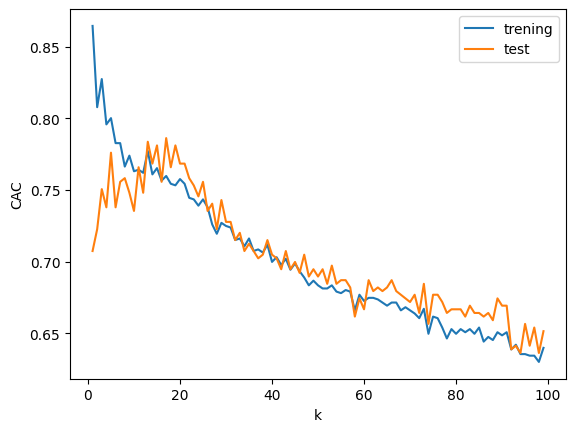

In [ ]:
from sklearn.metrics import accuracy_score

train_cac = []
test_cac = []
k_values = range(1, 100)

for k in k_values:
    knm.n_neighbors = k
    
    y_pred_train = knm.predict(X_train)
    y_pred_test = knm.predict(X_test)
    
    train_cac.append(accuracy_score(y_train, y_pred_train))
    test_cac.append(accuracy_score(y_test, y_pred_test))

import matplotlib.pyplot as plt

plt.plot(k_values, train_cac, label='trening')
plt.plot(k_values, test_cac, label='test')
plt.xlabel('k')
plt.ylabel('CAC')
plt.legend()
plt.show()


## **Zadatak 5: Stablo odluke**

Na podskupu za trening istrenirajte algoritam DT s različitim postavkama za dubinu stabla. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test te prokomentirajte dobivene rezultate.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtm = DecisionTreeClassifier(max_depth=2)
dtm.fit(X_train, y_train)

y_train_pred = dtm.predict(X_train)
y_test_pred = dtm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print('Trening:')
print(f'CAC: {train_acc}')
print(f'Precision: {train_precision}')
print(f'Recall: {train_recall}')
print(f'F1: {train_f1}\n')

print('Test:')
print(f'CAC: {test_acc}')
print(f'Precision: {test_precision}')
print(f'Recall: {test_recall}')
print(f'F1: {test_f1}')

Trening:
CAC: 0.7685589519650655
Precision: 0.715625
Recall: 0.6542857142857142
F1: 0.6835820895522389

Test:
CAC: 0.806615776081425
Precision: 0.7534246575342466
Recall: 0.7333333333333333
F1: 0.7432432432432433


Iscrtajte ovisnost mjere CAC o dubini stabla za podskupove za trening i test. Koristite linijski dijagram.

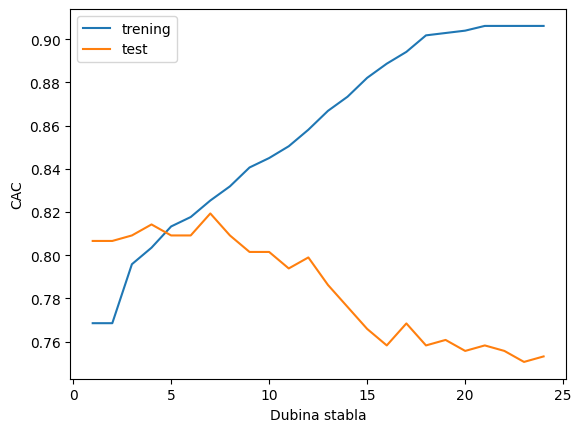

In [ ]:
train_cac = []
test_cac = []
depth_values = range(1, 25)

for depth in depth_values:
    model = DecisionTreeClassifier(max_depth=depth)
    
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_cac.append(accuracy_score(y_train, y_pred_train))
    test_cac.append(accuracy_score(y_test, y_pred_test))

import matplotlib.pyplot as plt

plt.plot(depth_values, train_cac, label='trening')
plt.plot(depth_values, test_cac, label='test')
plt.xlabel('Dubina stabla')
plt.ylabel('CAC')
plt.legend()
plt.show()
